## Breast Cancer Detection
### Project Lifecycle:
#### 1) Environment Setup & Data Loading
#### 2) Data Exploration
#### 3) Creating a custom dataset
#### 4) Building the classification model
#### 5) Defining the loss function
#### 6) Defining the optimizer
#### 7) Training and evaluation of the model
#### 8) Deploying the model
#### 9) Model inference on test data


In [1]:
!python -m venv /kaggle/working/breast_cancer_detection


In [2]:
!source /kaggle/working/breast_cancer_detection/bin/activate


In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2

### Data Loading

In [4]:
train_df = pd.read_csv('/kaggle/input/rsna-breast-cancer-detection/train.csv')

In [5]:
train_images_path= '/kaggle/input/breat-cancer-png-train-images'


### EDA

In [6]:
train_df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True


In [7]:
print(train_df['cancer'].value_counts())

0    53548
1     1158
Name: cancer, dtype: int64


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54706 entries, 0 to 54705
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   site_id                  54706 non-null  int64  
 1   patient_id               54706 non-null  int64  
 2   image_id                 54706 non-null  int64  
 3   laterality               54706 non-null  object 
 4   view                     54706 non-null  object 
 5   age                      54669 non-null  float64
 6   cancer                   54706 non-null  int64  
 7   biopsy                   54706 non-null  int64  
 8   invasive                 54706 non-null  int64  
 9   BIRADS                   26286 non-null  float64
 10  implant                  54706 non-null  int64  
 11  density                  29470 non-null  object 
 12  machine_id               54706 non-null  int64  
 13  difficult_negative_case  54706 non-null  bool   
dtypes: bool(1), float64(2)

In [9]:
train_df['view']

0         CC
1        MLO
2        MLO
3         CC
4         CC
        ... 
54701    MLO
54702    MLO
54703     CC
54704    MLO
54705     CC
Name: view, Length: 54706, dtype: object

In [10]:
train_df.isnull().sum()

site_id                        0
patient_id                     0
image_id                       0
laterality                     0
view                           0
age                           37
cancer                         0
biopsy                         0
invasive                       0
BIRADS                     28420
implant                        0
density                    25236
machine_id                     0
difficult_negative_case        0
dtype: int64

In [11]:
# Count the frequency of each category
category_counts = train_df['cancer'].value_counts()
category_counts

0    53548
1     1158
Name: cancer, dtype: int64

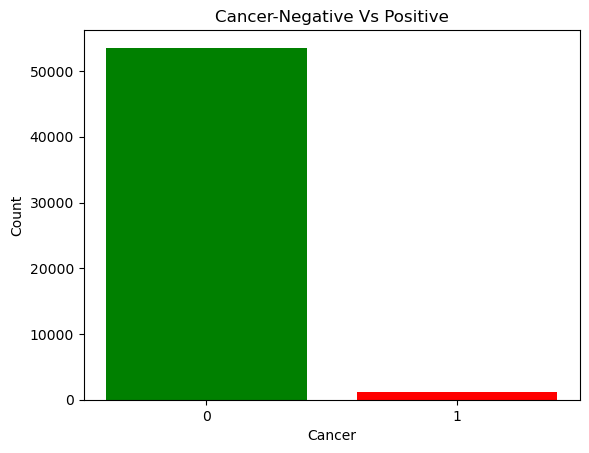

In [12]:

import matplotlib.pyplot as plt

# Count the frequency of each category
category_counts = train_df['cancer'].value_counts()

# Define colors for each category
colors = [ 'green', 'red',]

# Create a bar chart with specified colors
plt.bar(category_counts.index, category_counts.values, color=colors)

# Customize the chart
plt.xlabel('Cancer')
plt.ylabel('Count')
plt.title('Cancer-Negative Vs Positive')
plt.xticks(category_counts.index)

# Display the chart
plt.show()


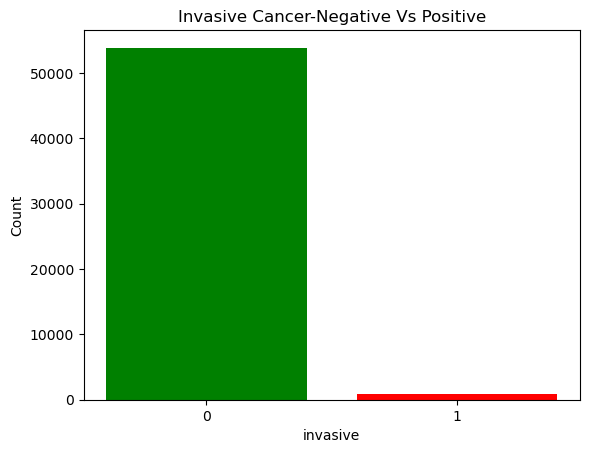

In [13]:
import matplotlib.pyplot as plt

# Count the frequency of each category
category_counts = train_df['invasive'].value_counts()

# Define colors for each category
colors = [ 'green', 'red',]

# Create a bar chart with specified colors
plt.bar(category_counts.index, category_counts.values, color=colors)

# Customize the chart
plt.xlabel('invasive')
plt.ylabel('Count')
plt.title('Invasive Cancer-Negative Vs Positive')
plt.xticks( category_counts.index)

# Display the chart
plt.show()


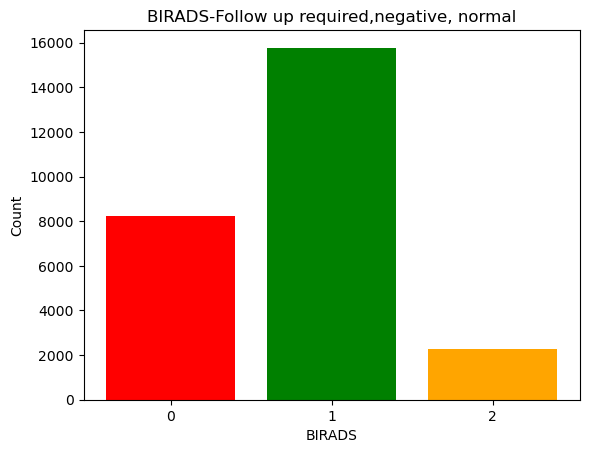

In [14]:
# Count the frequency of each category
category_counts = train_df['BIRADS'].value_counts()

# Define colors for each category
colors = [ 'green', 'red','orange']

# Create a bar chart with specified colors
plt.bar(category_counts.index, category_counts.values, color=colors)

# Customize the chart
plt.xlabel('BIRADS')
plt.ylabel('Count')
plt.title('BIRADS-Follow up required,negative, normal')
plt.xticks( category_counts.index)


# Display the chart
plt.show()


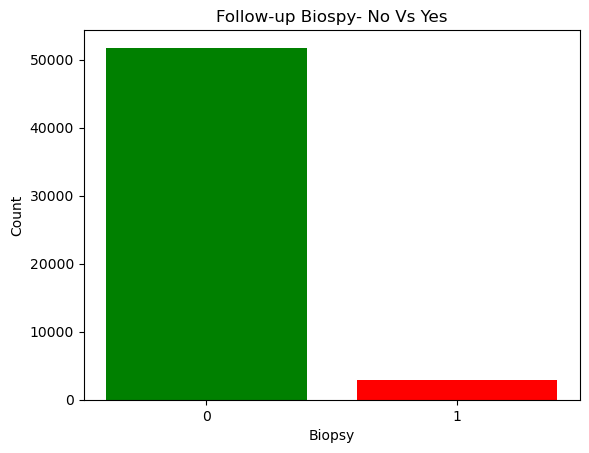

In [15]:


# Count the frequency of each category
category_counts = train_df['biopsy'].value_counts()

# Define colors for each category
colors = [ 'green', 'red',]

# Create a bar chart with specified colors
plt.bar(category_counts.index, category_counts.values, color=colors)

# Customize the chart
plt.xlabel('Biopsy')
plt.ylabel('Count')
plt.title('Follow-up Biospy- No Vs Yes')
plt.xticks( category_counts.index)


# Display the chart
plt.show()


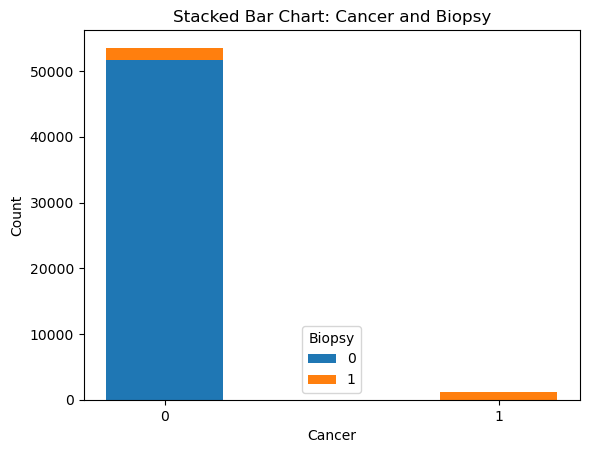

In [16]:

# Group the data by "cancer" and "biopsy" columns and calculate the count
grouped_data = train_df.groupby(['cancer', 'biopsy']).size().unstack()

# Get unique categories from the "cancer" column
categories = grouped_data.index

# Set the bar width
bar_width = 0.35

# Set the positions of the bars on the x-axis
r = range(len(categories))

# Create the stacked bar chart
for i, col in enumerate(grouped_data.columns):
    plt.bar(r, grouped_data[col], bottom=grouped_data.iloc[:, :i].sum(axis=1), width=bar_width, label=col)

# Customize the chart
plt.xlabel('Cancer')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Cancer and Biopsy')
plt.xticks(r, categories)
plt.legend(title='Biopsy')

# Display the chart
plt.show()


In [17]:
# Filter the DataFrame for positive diagnosed cases
positive_cases = train_df[train_df["cancer"]==1]

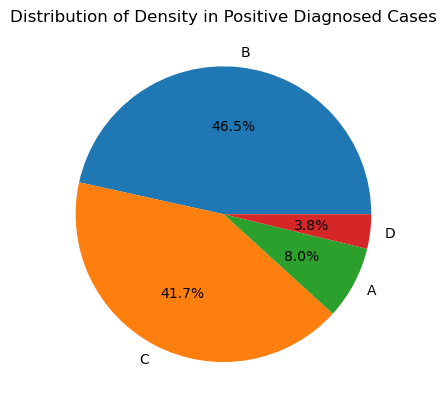

In [18]:
# Count the frequency of each density category within positive cases
density_counts= positive_cases["density"].value_counts()

# Create a pie chart
plt.pie(density_counts.values, labels= density_counts.index, autopct='%1.1f%%')

# Customize the chart
plt.title('Distribution of Density in Positive Diagnosed Cases')

# Display the chart
plt.show()

#### Density represents how dense the breast tissue is, with A being the least dense and D being the most dense, Extremely dense tissue can make diagnosis more difficult.

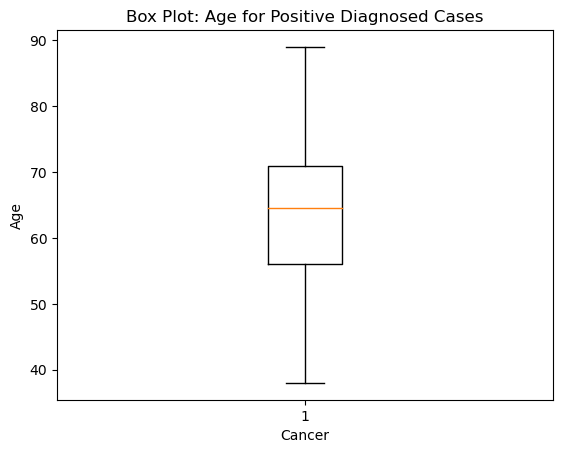

In [19]:
# Create the box plot
plt.boxplot(positive_cases['age'])

# Customize the chart
plt.xlabel('Cancer')
plt.ylabel('Age')
plt.title('Box Plot: Age for Positive Diagnosed Cases')

# Display the chart
plt.show()

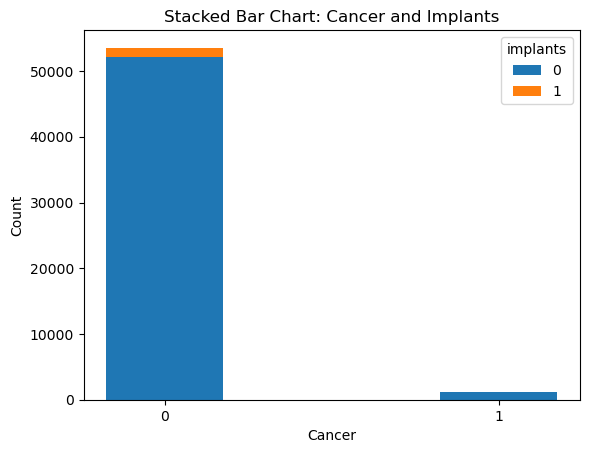

In [20]:
# Group the data by "cancer" and "biopsy" columns and calculate the count
grouped_data = train_df.groupby(['cancer', 'implant']).size().unstack()

# Get unique categories from the "cancer" column
categories = grouped_data.index

# Set the bar width
bar_width = 0.35

# Set the positions of the bars on the x-axis
r = range(len(categories))

# Create the stacked bar chart
for i, col in enumerate(grouped_data.columns):
    plt.bar(r, grouped_data[col], bottom=grouped_data.iloc[:, :i].sum(axis=1), width=bar_width, label=col)

# Customize the chart
plt.xlabel('Cancer')
plt.ylabel('Count')
plt.title('Stacked Bar Chart: Cancer and Implants')
plt.xticks(r, categories)
plt.legend(title='implants')

# Display the chart
plt.show()

### Displaying some sample images


In [21]:


# List the contents of the /kaggle/input/ directory
input_dir = '/kaggle/input/'
dataset_list = os.listdir(input_dir)

# Find your dataset directory
for dataset_name in dataset_list:
    if dataset_name != '__notebook_source__.ipynb':  # Exclude the notebook itself
        dataset_path = os.path.join(input_dir, dataset_name)
        if os.path.isdir(dataset_path):
            print("Dataset directory:", dataset_name)


Dataset directory: breat-cancer-png-train-images
Dataset directory: rsna-breast-cancer-detection


In [22]:
train_images_path= '/kaggle/input/breat-cancer-png-train-images'

In [23]:
# Create the path to each image.
for i in range(len(train_df)):
    train_df.loc[i, 'path'] = os.path.join(train_images_path + '/' + str(train_df.loc[i, 'patient_id']) + '_' + str(train_df.loc[i, 'image_id']) + '.png')
train_df.head()

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,path
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/breat-cancer-png-train-images/10...
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/breat-cancer-png-train-images/10...
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/breat-cancer-png-train-images/10...
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/breat-cancer-png-train-images/10...
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,/kaggle/input/breat-cancer-png-train-images/10...


In [24]:
# a sample path
train_df.loc[0, 'path']

'/kaggle/input/breat-cancer-png-train-images/10006_462822612.png'

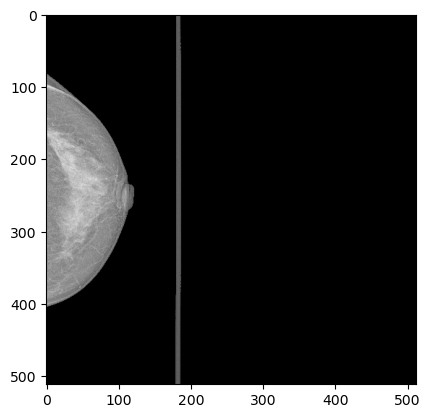

In [25]:
# a sample image
img = cv2.imread(train_df.loc[0, 'path'])
plt.imshow(img, cmap = 'gray')

In [26]:
img

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

In [27]:
img.shape

(512, 512, 3)

In [28]:
malignant_cancer= train_df[train_df['cancer']==1].reset_index(drop=True)
malignant_cancer

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,path
0,1,10130,388811999,L,MLO,71.0,1,1,1,0.0,0,B,49,False,/kaggle/input/breat-cancer-png-train-images/10...
1,1,10130,613462606,L,CC,71.0,1,1,1,0.0,0,B,49,False,/kaggle/input/breat-cancer-png-train-images/10...
2,1,10130,1360338805,L,CC,71.0,1,1,1,0.0,0,B,49,False,/kaggle/input/breat-cancer-png-train-images/10...
3,1,10130,1672636630,L,MLO,71.0,1,1,1,0.0,0,B,49,False,/kaggle/input/breat-cancer-png-train-images/10...
4,1,10226,461614796,L,MLO,71.0,1,1,1,0.0,0,C,49,False,/kaggle/input/breat-cancer-png-train-images/10...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,2,9707,1900919592,R,MLO,56.0,1,1,1,NaN,0,NaN,21,False,/kaggle/input/breat-cancer-png-train-images/97...
1154,2,9840,111786935,R,MLO,59.0,1,1,1,NaN,0,NaN,21,False,/kaggle/input/breat-cancer-png-train-images/98...
1155,2,9840,1559360810,R,CC,59.0,1,1,1,NaN,0,NaN,21,False,/kaggle/input/breat-cancer-png-train-images/98...
1156,2,9851,1409270544,L,MLO,58.0,1,1,0,NaN,0,NaN,48,False,/kaggle/input/breat-cancer-png-train-images/98...


#### Display some sample images with cancer

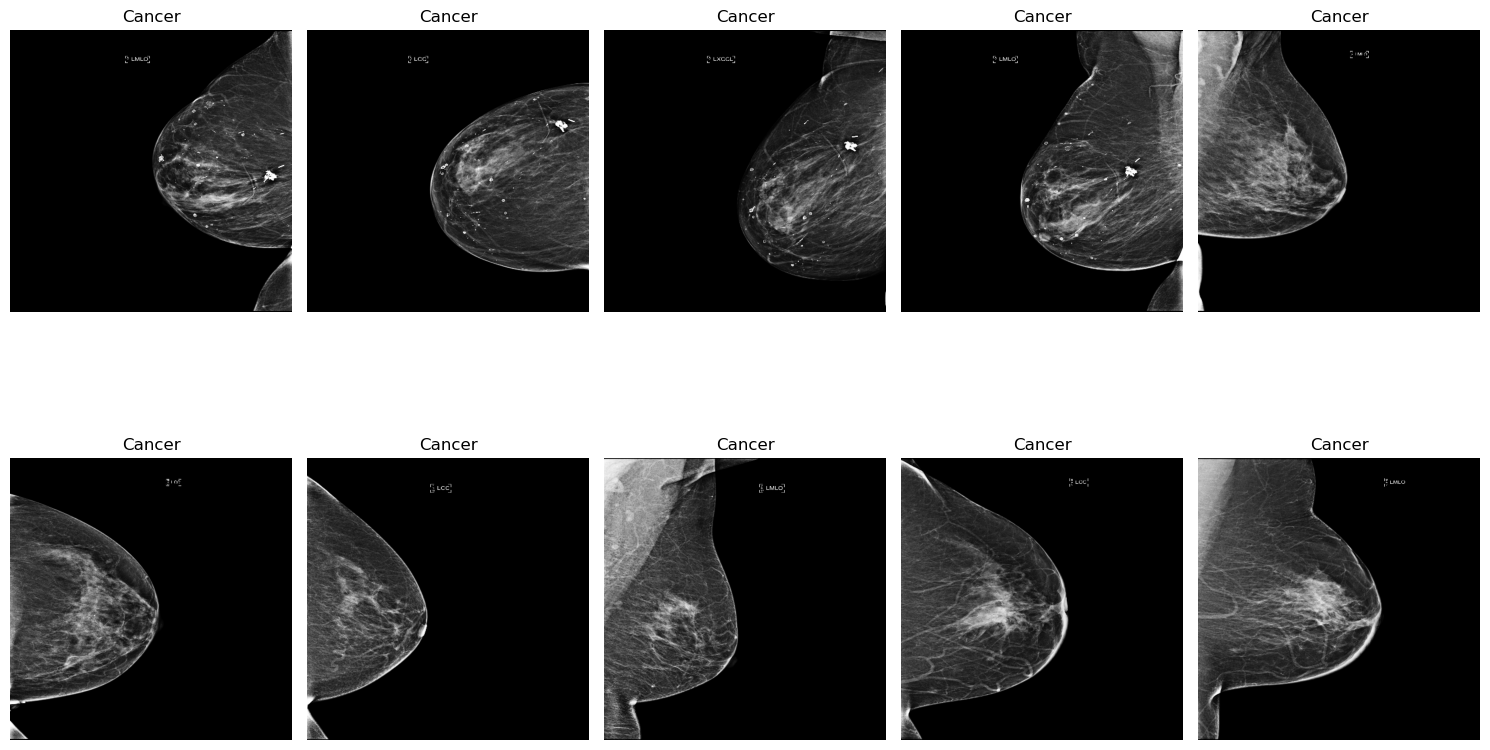

In [29]:
# Number of images to display
num_images_to_display = 10

# Calculate the number of columns based on the desired number of images per row
num_cols = 5

# Calculate the number of rows needed to display the images
num_rows = (num_images_to_display + num_cols - 1) // num_cols

# Display the images in a grid layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15,10))

# Flatten the axs array if necessary
if num_rows > 1:
    axs = axs.flatten()


# Iterate over the images
for i in range(num_images_to_display):
    img = cv2.imread(malignant_cancer.loc[i, 'path'])
    axs[i].imshow(img)
    axs[i].set_title('Cancer')
    axs[i].axis('off')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


#### Display some sample images without cancer

In [30]:
benign_cancer= train_df[train_df['cancer']==0].reset_index(drop=True)
benign_cancer

,site_id,patient_id,image_id,laterality,view,age,cancer,biopsy,invasive,BIRADS,implant,density,machine_id,difficult_negative_case,path
0,2,10006,462822612,L,CC,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/breat-cancer-png-train-images/10...
1,2,10006,1459541791,L,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/breat-cancer-png-train-images/10...
2,2,10006,1864590858,R,MLO,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/breat-cancer-png-train-images/10...
3,2,10006,1874946579,R,CC,61.0,0,0,0,NaN,0,NaN,29,False,/kaggle/input/breat-cancer-png-train-images/10...
4,2,10011,220375232,L,CC,55.0,0,0,0,0.0,0,NaN,21,True,/kaggle/input/breat-cancer-png-train-images/10...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53543,1,9973,1729524723,R,MLO,43.0,0,0,0,1.0,0,C,49,False,/kaggle/input/breat-cancer-png-train-images/99...
53544,1,9989,63473691,L,MLO,60.0,0,0,0,NaN,0,C,216,False,/kaggle/input/breat-cancer-png-train-images/99...
53545,1,9989,1078943060,L,CC,60.0,0,0,0,NaN,0,C,216,False,/kaggle/input/breat-cancer-png-train-images/99...
53546,1,9989,398038886,R,MLO,60.0,0,0,0,0.0,0,C,216,True,/kaggle/input/breat-cancer-png-train-images/99...


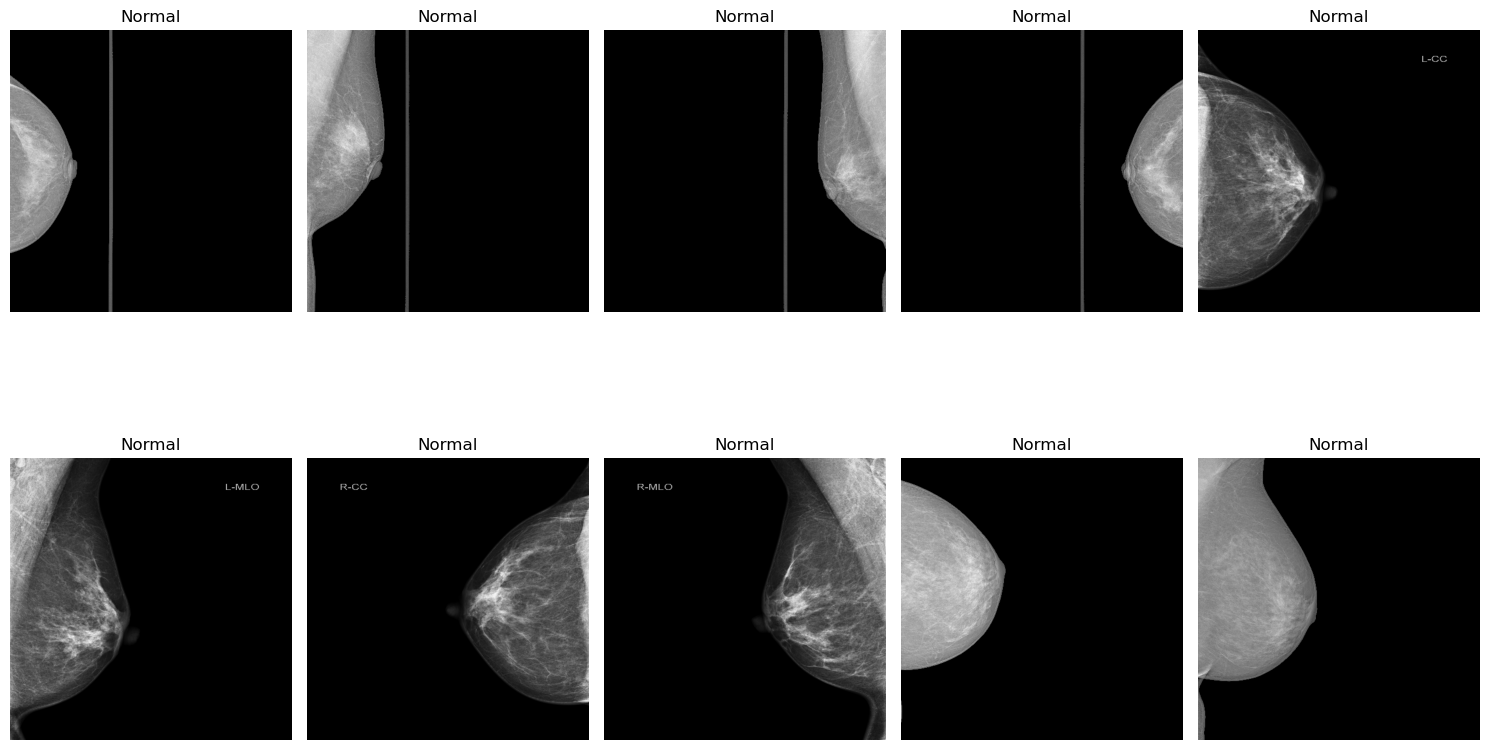

In [31]:
# Number of images to display
num_images_to_display = 10

# Calculate the number of columns based on the desired number of images per row
num_cols = 5

# Calculate the number of rows needed to display the images
num_rows = (num_images_to_display + num_cols - 1) // num_cols

# Display the images in a grid layout
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15,10))

# Flatten the axs array if necessary
if num_rows > 1:
    axs = axs.flatten()


# Iterate over the images
for i in range(num_images_to_display):
    img = cv2.imread(benign_cancer.loc[i, 'path'])
    axs[i].imshow(img)
    axs[i].set_title('Normal')
    axs[i].axis('off')

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()


##### As we can see that just by viewing the images, we can't know if a patient has cancer or not.

### Creating a custom dataset

In [32]:
from PIL import Image
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms


In [33]:
#fix randm seed for reproductibilty
torch.manual_seed(0)

In [34]:
class breastcancerdataset(Dataset):
    def __init__(self,train_df,transform):
        self.train_df = train_df
        #path to images
        self.image_path= train_df['path']
        #obtain labels from data frame
        self.labels= [img for img in train_df['cancer']]
        self.transform = transform
        
    def __len__(self):
        #return the size dataset
        return len(self.train_df)
    
    def __getitem__(self,idx):
        #open image, apply transforms and return with label
        image = Image.open(self.image_path[idx]) #PIL image
        image = self.transform(image)
        return image, self.labels[idx]

In [35]:
import torchvision.transforms as transform
data_transformer = transforms.Compose([transforms.ToTensor()])

In [36]:
cancer_dataset = breastcancerdataset(train_df,data_transformer)    

In [37]:
print(len(cancer_dataset))

54706


In [38]:
#load an image
img,label = cancer_dataset[9]
print(img.shape,torch.min(img), torch.max(img))



torch.Size([1, 512, 512]) tensor(0.) tensor(0.8941)


we can see that the dataset returns images in the (Channels, Height, Width) format
and pixel values are normalized to the range [0.0, 1.0]. This is the result of transforms.
ToTensor() converts a PIL image into the range [0, 255] to torch.FloatTensor of
shape (C x H x W) in the range [0.0, 1.0]. It is common to use this formatting when working
with images in PyTorch.

### Splitting the dataset

In [39]:
from torch.utils.data import random_split

len_cancer= len(cancer_dataset)
len_train=int(0.8*len_cancer)
len_val = len_cancer- len_train
train_ds,val_ds = random_split(cancer_dataset,[len_train,len_val])

print("train dataset length:", len(train_ds))
print("validation dataset length:",len(val_ds))


train dataset length: 43764
validation dataset length: 10942


In [40]:
for x,y in train_ds:
    print(x.shape,y)
    break
 

torch.Size([1, 512, 512]) 0


In [41]:
for x, y in val_ds:
    print(x.shape,y)
    break
    

torch.Size([1, 512, 512]) 0


image indices: [ 2732 43567 42613 21243]
torch.Size([3, 516, 2058])


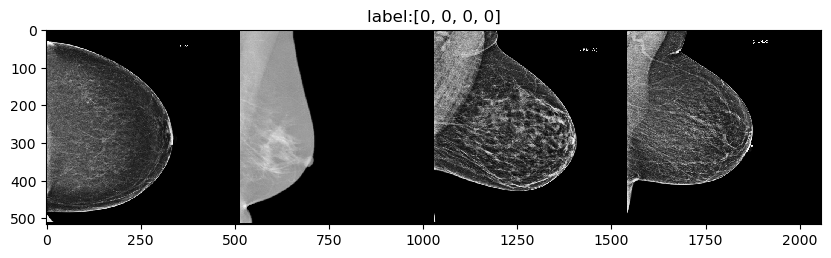

In [42]:
from torchvision import utils
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.random.seed(0)

#Define a helper function to show an image
def show(img,y,color=False):
    #convert tensor to numpy array
    npimg= img.numpy()
    
    #convert to H*W*C shape
    npimg_tr= np.transpose(npimg,(1,2,0))
    if color== False:
        npimg_tr = npimg_tr[:,:,0]
        plt.imshow(npimg_tr, interpolation = 'nearest', cmap= "gray")
    else:
        #display images
        plt.imshow(npimg_tr,interpolation ='nearest')
    plt.title("label:" +str(y))

grid_size=4
rnd_inds = np.random.randint(0,len(train_ds), grid_size)
print("image indices:", rnd_inds)

x_grid_train = [train_ds[i][0] for i in rnd_inds]
y_grid_train = [train_ds[i][1] for i in rnd_inds]

x_grid_train = utils.make_grid(x_grid_train, nrow=4, padding= 2)
print(x_grid_train.shape)

plt.rcParams['figure.figsize'] = (10.0,5)
show(x_grid_train,y_grid_train)

    

        
    
    

image indices: [9225 7891 4373 5874]
torch.Size([3, 516, 2058])


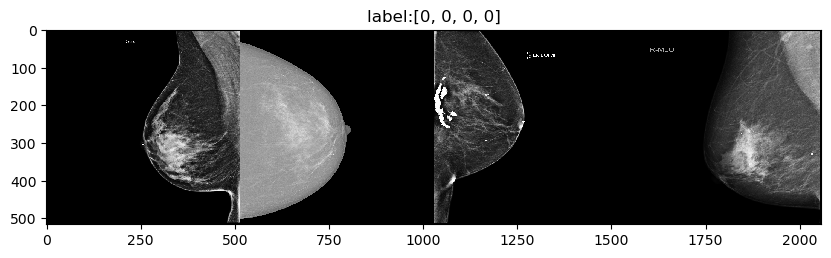

In [43]:
grid_size=4
rnd_inds=np.random.randint(0,len(val_ds),grid_size)
print("image indices:",rnd_inds)
x_grid_val=[val_ds[i][0] for i in range(grid_size)]
y_grid_val=[val_ds[i][1] for i in range(grid_size)]
x_grid_val=utils.make_grid(x_grid_val, nrow=4, padding=2)
print(x_grid_val.shape)
show(x_grid_val,y_grid_val)



### Data Transformation

**Image transformation and image augmentation** are necessary for training deep learningmodels. By using image transformations, we can expand our dataset or resize andnormalize it to achieve better model performance. Typical transformations include **horizontal and vertical flipping, rotation, and resizing.**

**RandomHorizontalFlip and RandomVerticalFlip** will flip the imagehorizontally and vertically with a probability of 0.5, respectively.
The **RandomRotation function** rotates images in the range of [-45,45] degrees.
Also, **RandomSizedCrop** crops a square image randomly in the range of [72, 512] and then resizes it to the original size of 512x512.
We used **transforms.ToTensor** to normalize the images in the range [0, 1] andconvert them into tensors. 

In [44]:
train_transformer = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.RandomVerticalFlip(p=0.5),
    transforms.RandomRotation(45),
transforms.RandomResizedCrop(512,scale=(0.8,1,0),
    ratio=(1.0,1.0)), transforms.ToTensor()])

 For the validation dataset, we don't need any augmentation. So, we only convert the images into tensors, normalized to the range [0, 1] in the transforms function:

In [45]:
val_transformer = transforms.Compose([transforms.ToTensor()])

Overwrite the transform functions of train_ds and val_ds:

In [46]:
train_ds.transform = train_transformer
val_ds.transform = val_transformer

### Creating Data Loaders

We will be using a PyTorch dataloaders to extract data batches from the dataset. 

In [47]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_ds,batch_size=32,shuffle=True)
val_dl = DataLoader(val_ds, batch_size=64, shuffle=False)

In [48]:
#extract a batch from training data
for x,y in train_dl:
    print(x.shape)
    print(y.shape)
    break


torch.Size([32, 1, 512, 512])
torch.Size([32])


In [49]:
#extract a batch from validation data

for x,y in val_dl:
    print(x.shape)
    print(y.shape)
    break

torch.Size([64, 1, 512, 512])
torch.Size([64])


In [ ]:
#extract a batch from training data
for x,y in train_dl:
    print(x.shape)
    print(y.shape)
    break


### Building the classification model
[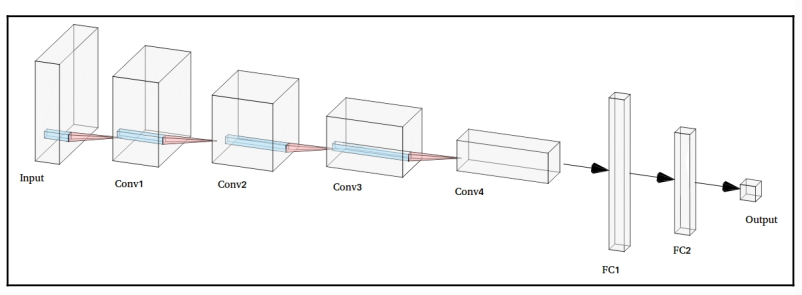](http://)

In [50]:
#get labels for validation dataset
y_val= [y for _,y in val_ds]

In [51]:
def accuracy(labels,out):
    return np.sum(out==labels)/float(len(labels))

In [52]:
np.zeros_like(y_val)

array([0, 0, 0, ..., 0, 0, 0])

In [53]:
#calculationg a dumb baseline for all-zero predictions:
#accuracy all zero predictions
acc_all_zeros= accuracy(y_val,np.zeros_like(y_val))
print("accuracy all zero prediction : %.2f" %acc_all_zeros)


accuracy all zero prediction : 0.98


In [54]:
#calculationg a dumb baseline for all-one predictions:
#accuracy all one predictions
acc_all_ones= accuracy(y_val,np.ones_like(y_val))
print("accuracy all one prediction: %.2f" %acc_all_ones)

accuracy all one prediction: 0.02


In [55]:
#accuracy random predictions
acc_random = accuracy(y_val,np.random.randint(2,size=len(y_val)))
print("accuracy all one prediction: %.2f" %acc_random)

accuracy all one prediction: 0.49


#### helper function to calculate the output size of a CNN layer

In [56]:
import torch.nn as nn
import numpy as np


In [57]:
def findConv2dOutShape(H_in,W_in,conv,pool=2):
    #get conv arguments
    kernel_size=conv.kernel_size
    stride= conv.stride
    padding = conv.padding
    dilation = conv.dilation
    H_out= np.floor((H_in+2*padding[0]-dilation[0]*(kernel_size[0]-1)-1)/stride[0]+1)
    W_out= np.floor((W_in+2*padding[1]-dilation[1]*(kernel_size[1]-1)-1)/stride[1]+1)
    if pool:
        H_out/=pool
        W_out/=pool
    return int(H_out),int(W_out)

In [58]:
import torch.nn as nn
import torch.nn.functional as F

In [59]:
#example
#The layer takes an input with 1 channels and produces an output with 8 channels, using a kernel size of 3.
conv1 = nn.Conv2d(1,8,kernel_size= 3)
h,w = findConv2dOutShape(512,512,conv1)
print(h,w)

255 255


In [60]:
class Net(nn.Module):
    def __init__(self,params):
        super(Net,self).__init__()
        C_in,H_in,W_in= params["input_shape"]
        init_f= params["initial_filters"]
        num_fc1=params["num_fc1"]
        num_classes= params["num_classes"]
        self.dropout_rate = params["dropout_rate"]
        
        self.conv1 = nn.Conv2d(C_in,init_f, kernel_size=3)
        h,w= findConv2dOutShape(H_in,W_in,self.conv1)
        self.conv2 = nn.Conv2d(init_f,2*init_f,kernel_size=3)
        h,w= findConv2dOutShape(h,w,self.conv2)
        self.conv3= nn.Conv2d(2*init_f,4*init_f,kernel_size=3)
        h,w= findConv2dOutShape(h,w,self.conv3)
        self.conv4= nn.Conv2d(4*init_f,8*init_f,kernel_size=3)
        h,w= findConv2dOutShape(h,w, self.conv4)
        #compute the flatten size
        self.num_flatten=h*w*8*init_f
        self.fc1= nn.Linear(self.num_flatten, num_fc1)
        self.fc2= nn.Linear(num_fc1,num_classes)
        
    def forward(self,x):
        x= F.relu(self.conv1(x))
        x= F.max_pool2d(x,2,2)
        x= F.relu(self.conv2(x))
        x= F.max_pool2d(x,2,2)
        x= F.relu(self.conv3(x))
        x= F.max_pool2d(x,2,2)
        x= F.relu(self.conv4(x))
        x= F.max_pool2d(x,2,2)
        x= x.view(-1,self.num_flatten)
        x= F.relu(self.fc1(x))
        x=F.dropout(x,self.dropout_rate, training= self.training)
        x= self.fc2(x)
        return F.log_softmax(x,dim=1)
        

In [88]:
#dict to define model parameters
params_model= {"input_shape": (1,512,512),"initial_filters":8,
              "num_fc1":100,"dropout_rate":0.25, "num_classes":2}

In [62]:
#create model
cnn_model = Net(params_model)

In [63]:
#move model to cuda/gpu device
if torch.cuda.is_available():
    device= torch.device("cuda")
    cnn_model = cnn_model.to(device)

In [64]:
#print the model
print(cnn_model)

Net(
  (conv1): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=57600, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=2, bias=True)
)


In [65]:
print(next(cnn_model.parameters()).device)

cuda:0


In [66]:
!pip install torchsummary

In [67]:
from torchsummary import summary
summary(cnn_model,input_size=(1,512,512),device= device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 8, 510, 510]              80
            Conv2d-2         [-1, 16, 253, 253]           1,168
            Conv2d-3         [-1, 32, 124, 124]           4,640
            Conv2d-4           [-1, 64, 60, 60]          18,496
            Linear-5                  [-1, 100]       5,760,100
            Linear-6                    [-1, 2]             202
Total params: 5,784,686
Trainable params: 5,784,686
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 1.00
Forward/backward pass size (MB): 29.20
Params size (MB): 22.07
Estimated Total Size (MB): 52.27
----------------------------------------------------------------


#### Some key points
By providing the number of output channels of the previous layer as the number of input channels to the next layer, we can define each layer. However, this becomes tricky when it comes to nn.Linear layers.The linear layer accepts a 2D tensor. That is why we need the view method in the forward function to reshape the 4D tensor into a 2D tensor.
##### flatten/reshape
x = x.view(-1, self.num_flatten
we get self.num_flatten=h*w*8*init_f
 
Dropout layer before the output layer to reduce the overfitting problem in deep learning models. Notice that we set the training = self.training argument in
the F.dropout function. The self.training parameter is automatically set to True during training and False at evaluation. This will bypass the dropout layer at the
deployment time.

### Defining the loss function
The loss function depends on the output activation that we are using, and the number of final outputs. For binary classification, we can either choose 1 or 2 outputs, for which log_softmax activation is suitable, since it expands well for the multi-class classification.
**Log Softmax Activation Function**- PyTorch combines the log and softmax operations into one function due to numerical stability and speed. The "softmax" part of the function ensures that all the values in the resulting distribution are positive and sum up to 1, resembling a valid probability distribution.
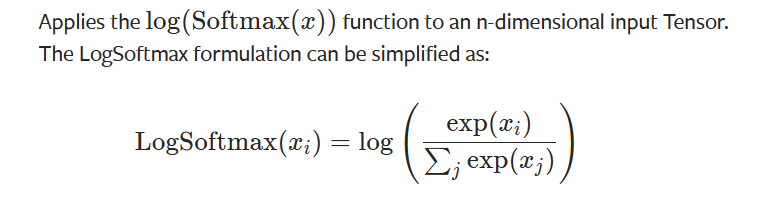
*Parameters:*
dim (int) – A dimension along which LogSoftmax will be computed.
*Returns:*
a Tensor of the same dimension and shape as the input with values in the range [-inf, 0)

**Negative log likelihood loss** tells us how well the model's predicted probabilities match the true labels. It penalizes the model more if it makes confident and incorrect predictions, while rewarding it for making confident and correct predictions.


In [68]:
# define the loss function
loss_funct = nn.NLLLoss(reduction= "sum")


In [69]:
# fix random seed
torch.manual_seed(0)
n,c=8,2
y = torch.randn(n, c, requires_grad=True)
ls_F = nn.LogSoftmax(dim=1)
y_out=ls_F(y)
print(y_out.shape)

torch.Size([8, 2])


In [70]:
target = torch.randint(c,size=(n,))
print(target.shape)

torch.Size([8])


In [71]:
loss = loss_funct(y_out, target)
print(loss.item())

5.266995429992676


In [72]:
#we will compute the gradients of the loss with respect to y
loss.backward()
print (y.data)

tensor([[-1.1258, -1.1524],
        [-0.2506, -0.4339],
        [ 0.8487,  0.6920],
        [-0.3160, -2.1152],
        [ 0.3223, -1.2633],
        [ 0.3500,  0.3081],
        [ 0.1198,  1.2377],
        [ 1.1168, -0.2473]])


### Defining the optimizer

In [73]:
from torch import optim 
opt= optim.Adam(cnn_model.parameters(),lr=3e-4)

In [74]:
#get learning rate
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']
current_lr = get_lr(opt)
print('current lr={}'.format(current_lr))


current lr=0.0003


In [75]:
#define a learning scheduler using the ReduceLROnPlateau

from torch.optim.lr_scheduler import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(opt,mode="min",factor=0.5,patience=20,verbose=1)

In [76]:
for i in range(100):
    lr_scheduler.step(1)

Epoch 00022: reducing learning rate of group 0 to 1.5000e-04.
Epoch 00043: reducing learning rate of group 0 to 7.5000e-05.
Epoch 00064: reducing learning rate of group 0 to 3.7500e-05.
Epoch 00085: reducing learning rate of group 0 to 1.8750e-05.


### Training and Evaluation of the model

In [77]:
#a helper function to count the number of correct predictions/ data batch
def metrics_batch(output, target):
 # get output class
 pred = output.argmax(dim=1, keepdim=True)
 # compare output class with target class
 corrects=pred.eq(target.view_as(pred)).sum().item()
 return corrects
    

In [78]:
#helper function to compute the loss value per batch of data
def loss_batch(loss_func,output,target,opt=None):
    
    loss= loss_func(output,target)
    
    with torch.no_grad():
        metric_b = metrics_batch(output,target)
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
    return loss.item(), metric_b

In [79]:
# helper function to compute the loss value and the performance metric for the epoch
#Define the loss_epoch function:

def loss_epoch(model,loss_funct,dataset_dl,sanity_check=False,opt=None):
    running_loss= 0.0
    running_metric=0.0
    len_data=len(dataset_dl.dataset)
    
    for xb,yb in dataset_dl:
        #move batch to device
        xb= xb.to(device)
        yb= yb.to(device)
        
        #get model output
        output = model(xb)
        
        #get loss per batch
        loss_b, metric_b = loss_batch(loss_func,output,yb,opt)
        
        #update running loss
        running_loss+= loss_b
        
        #update running metric
        if metric_b is not None:
            running_metric+= metric_b
            
        #break the loop in case of sanity check
        if sanity_check is True:
            break
    
    #average loss value
    loss = running_loss/float(len_data)
    
    #average metric value
    metric= running_metric/float(len_data)
    
    return loss, metric
        

In [80]:
def train_val(model,params):
    #extract model parameters
    num_epochs = params["num_epochs"]
    loss_func = params["loss_func"]
    opt= params["optimizer"]
    train_dl= params["train_dl"]
    val_dl= params["val_dl"]
    sanity_check = params["sanity_check"]
    lr_scheduler= params["lr_scheduler"]
    path2weights= params["path2weights"]
    
    os.makedirs(os.path.dirname(path2weights), exist_ok=True)  # Create the parent directory
    
    # history of loss values in each epoch
    loss_history= { 
        "train":[], 
        "val": [],
    }
    #history of metric values in each epoch
    metric_history = {
        "train": [],
        "val": [],
    }
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy(model.state_dict())
    
    #initialize best loss to a large value
    best_loss= float("inf")
    
    #training loss over an epoch
    for epoch in range(num_epochs):
        
        #get current learning rate
        current_lr= get_lr(opt)
        print('Epoch {}/{}, current lr = {}'.format(epoch,num_epochs-1,current_lr))
        
        #train model on training dataset
        model.train()
        train_loss,train_metric= loss_epoch(model, loss_func,train_dl,sanity_check,opt)
        
        #collect loss and metric for training dataset
        loss_history["train"].append(train_loss)
        metric_history["train"].append(train_metric)
        
        # evaluate model on validation dataset
        model.eval()
        with torch.no_grad():
            val_loss,val_metric = loss_epoch(model,loss_func,val_dl,sanity_check)
            
            
        #store best model
        if val_loss < best_loss:
            best_loss= val_loss
            best_model_wts = copy.deepcopy(model.state_dict())
                
            #store weights into a local file
            torch.save(model.state_dict(),path2weights)
            print("copied best model weights!")
         
        #collect loss and metric for validation dataset
        loss_history["val"].append(val_loss)
        metric_history["val"].append(val_metric)
       
        #learning rate schedule
        lr_scheduler.step(val_loss)
        if current_lr != get_lr(opt):
            print("Loading best model weights!")
            model.load_state_dict(best_model_wts)
        
        print("train loss: %.6f, dev loss: %.6f,accuracy: %.2f"
                %(train_loss,val_loss,100*val_metric))
        print("-"*10)
            
    #load best model weights
    model.load_state_dict(best_model_wts)
    torch.save(model.state_dict(), path2weights)
    print("Saved final model weights!")
   
    return model, loss_history,metric_history
        

In [81]:
import copy 

loss_func = nn.NLLLoss(reduction="sum")
opt= optim.Adam(cnn_model.parameters(), lr= 3e-4)
lr_scheduler = ReduceLROnPlateau(opt, mode= "min",factor=0.5,patience= 20,verbose=1)
params_train={
 "num_epochs": 100,
 "optimizer": opt,
 "loss_func": loss_func,
 "train_dl": train_dl,
 "val_dl": val_dl,
 "sanity_check": True,
 "lr_scheduler": lr_scheduler,
 "path2weights": "/kaggle/working/models/weights/pt",
}

# train and validate the model
cnn_model,loss_hist,metric_hist=train_val(cnn_model,params_train)

Epoch 0/99, current lr = 0.0003
copied best model weights!
train loss: 0.000500, dev loss: 0.002309,accuracy: 0.55
----------
Epoch 1/99, current lr = 0.0003
copied best model weights!
train loss: 0.000245, dev loss: 0.001530,accuracy: 0.55
----------
Epoch 2/99, current lr = 0.0003
copied best model weights!
train loss: 0.000105, dev loss: 0.001406,accuracy: 0.55
----------
Epoch 3/99, current lr = 0.0003
train loss: 0.000038, dev loss: 0.001653,accuracy: 0.55
----------
Epoch 4/99, current lr = 0.0003
train loss: 0.000103, dev loss: 0.002000,accuracy: 0.55
----------
Epoch 5/99, current lr = 0.0003
train loss: 0.000004, dev loss: 0.002383,accuracy: 0.55
----------
Epoch 6/99, current lr = 0.0003
train loss: 0.000278, dev loss: 0.002560,accuracy: 0.55
----------
Epoch 7/99, current lr = 0.0003
train loss: 0.000001, dev loss: 0.002722,accuracy: 0.55
----------
Epoch 8/99, current lr = 0.0003
train loss: 0.000186, dev loss: 0.002795,accuracy: 0.55
----------
Epoch 9/99, current lr = 0.0

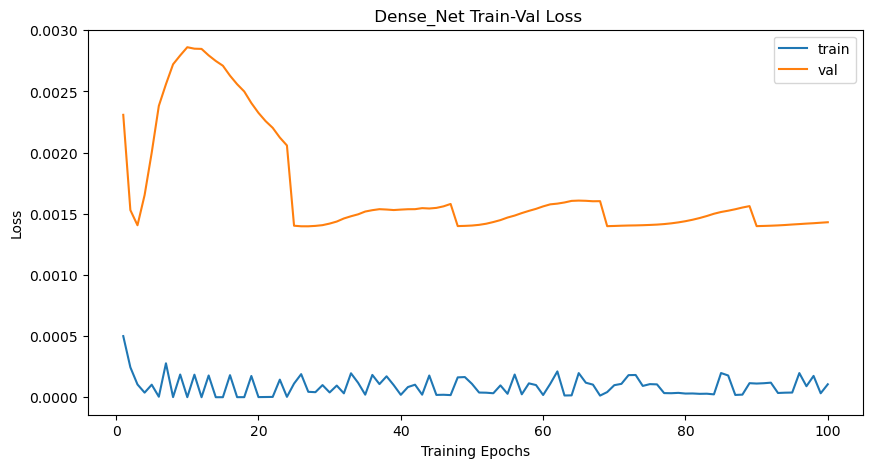

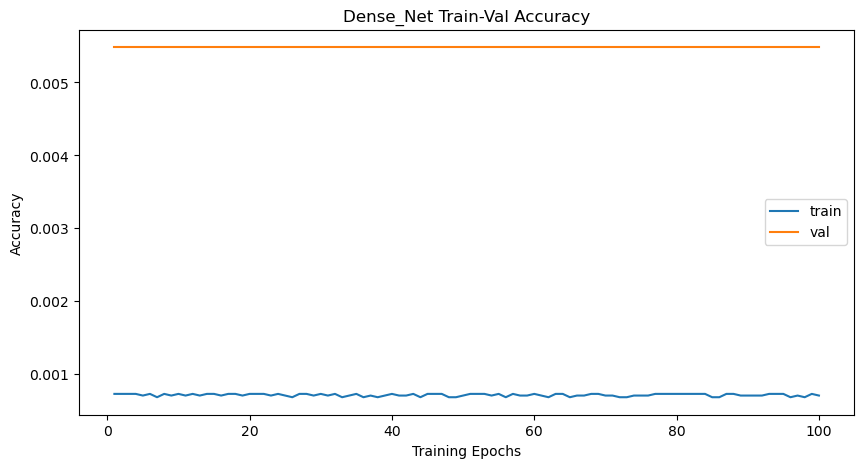

In [84]:
# Train-Validation Progress
num_epochs=params_train["num_epochs"]

# plot loss progress
plt.title(" Dense_Net Train-Val Loss")
plt.plot(range(1,num_epochs+1),loss_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),loss_hist["val"],label="val")
plt.ylabel("Loss")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

# plot accuracy progress
plt.title("Dense_Net Train-Val Accuracy")
plt.plot(range(1,num_epochs+1),metric_hist["train"],label="train")
plt.plot(range(1,num_epochs+1),metric_hist["val"],label="val")
plt.ylabel("Accuracy")
plt.xlabel("Training Epochs")
plt.legend()
plt.show()

## DenseNet121 Model

In [83]:
import torchvision.models as models
densenet121_model = models.densenet121(pretrained=True)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth
100%|██████████| 30.8M/30.8M [00:00<00:00, 141MB/s] 


In [87]:
# Train and validate the model
densenet121_model, loss_hist, metric_hist = train_val(densenet121_model, params_train)

Epoch 0/99, current lr = 1.875e-05


RuntimeError: Given groups=1, weight of size [64, 3, 7, 7], expected input[32, 1, 512, 512] to have 3 channels, but got 1 channels instead